## Debernardi Cancer Data - Model Comparisons

In this notebook, we are going to compare lots of regression, multi-class classification, and binary classification models on the Debernardi pancreatic cancer data set.

In [ ]:
# import base packages

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

#upload the dataset to the temporary session storage on the left- the file icon

#import the data file from session storage
df = pd.read_csv('/content/Debernardi-data.csv')

In [ ]:
#this will tell us how big the dataset is, with rows then columns
print(df.shape)

#print the list of column names
print (df.columns, len(df.columns))

(590, 14)
Index(['sample_id', 'patient_cohort', 'sample_origin', 'age', 'sex',
       'diagnosis', 'stage', 'benign_sample_diagnosis', 'plasma_CA19_9',
       'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A'],
      dtype='object') 14


In [ ]:
#print the first 6 rows to see what the data looks like
print(df.head())

  sample_id patient_cohort sample_origin  age sex  diagnosis stage  \
0        S1        Cohort1          BPTB   33   F          1   NaN   
1       S10        Cohort1          BPTB   81   F          1   NaN   
2      S100        Cohort2          BPTB   51   M          1   NaN   
3      S101        Cohort2          BPTB   61   M          1   NaN   
4      S102        Cohort2          BPTB   62   M          1   NaN   

  benign_sample_diagnosis  plasma_CA19_9  creatinine     LYVE1      REG1B  \
0                     NaN           11.7     1.83222  0.893219   52.94884   
1                     NaN            NaN     0.97266  2.037585   94.46703   
2                     NaN            7.0     0.78039  0.145589  102.36600   
3                     NaN            8.0     0.70122  0.002805   60.57900   
4                     NaN            9.0     0.21489  0.000860   65.54000   

         TFF1     REG1A  
0  654.282174  1262.000  
1  209.488250   228.407  
2  461.141000       NaN  
3  142.95000

In [ ]:
# Checking to see if there are any columns with missing values
df.isnull().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [ ]:
# to preserve the benign samples, we can fill the missing values in the "stage" and benign_sample_diagnosis column with a placeholder
df['stage'] = df['stage'].fillna('b')
df['benign_sample_diagnosis'] = df['benign_sample_diagnosis'].fillna('b')
# Checking columns with missing values again
df.isnull().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                        0
benign_sample_diagnosis      0
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [ ]:
print("... Drop columns with too many NAs ...", flush=True)
        # Drop columns with > 60% missing data
n_cols_before_drop = len(df.columns.values)
df2 = df[df.columns[df.isna().mean() <= 0.40]]
n_cols_after_drop = len(df2.columns.values)
print(f"Using {n_cols_after_drop} features of {n_cols_before_drop}, due to NA values.")

... Drop columns with too many NAs ...
Using 12 features of 14, due to NA values.


In [ ]:
#print the list of column names
print (df2.columns, len(df2.columns))

Index(['sample_id', 'patient_cohort', 'sample_origin', 'age', 'sex',
       'diagnosis', 'stage', 'benign_sample_diagnosis', 'creatinine', 'LYVE1',
       'REG1B', 'TFF1'],
      dtype='object') 12


In [ ]:
# explore relationship between REG1B and Diagnosis
X= df2['REG1B']
print(X.shape)
y = df2['diagnosis']
print(y.shape)

(590,)
(590,)


In [ ]:
X = X.values.reshape(-1,1)

In [ ]:
#let's explore various regression models to investigate the relationship between REG1B and diagnosis
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, ElasticNet, BayesianRidge, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error, mean_absolute_error

r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
r3 = KNeighborsRegressor()
r4 = Ridge(alpha=1.0)
r5 = linear_model.BayesianRidge()
r6 = ElasticNet(random_state=0)


In [ ]:
# to visualize the performance of the different regressors
#let's fit each regressor on the first 20 rows of  data and plot the predictions

# let's define a subset of the observations
xt = X[:20]

# fit each regressor
r1.fit(X, y)
r2.fit(X, y)
r3.fit(X, y)
r4.fit(X, y)
r5.fit(X, y)
r6.fit(X, y)

#make predictions on subset
pred1 = r1.predict(xt)
pred2 = r2.predict(xt)
pred3 = r3.predict(xt)
pred4 = r4.predict(xt)
pred5 = r5.predict(xt)
pred6 = r6.predict(xt)

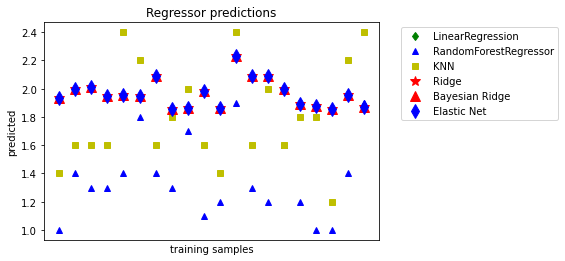

In [ ]:
# let's plot the first 20 predictions to see what each model predicted
plt.figure()
plt.plot(pred1, "gd", label="LinearRegression")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="KNN")
plt.plot(pred4, "r*", ms=10, label="Ridge")
plt.plot(pred5, "r^", ms=10, label="Bayesian Ridge")
plt.plot(pred6, "bd", ms=10, label="Elastic Net")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Regressor predictions")

plt.show()


In [ ]:
# looks like the linear regression, elastic-net, bayesian ridge, and ridge models all predicted the same values
# KNN and random forest predictions are unique and different from the other 4 models

# let's check some metrics for these regressor models
#first we need to predict all the Y values, not just the first 20
pred1 = r1.predict(X)
pred2 = r2.predict(X)
pred3 = r3.predict(X)
pred4 = r4.predict(X)
pred5 = r5.predict(X)
pred6 = r6.predict(X)

# now let's see the R^2 score for each model-  
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 
# A constant model that always predicts the expected (average) value of y, disregarding the input features, would get an  score of 0.0.
print("LinearRegression r2 score: ", r2_score(y, pred1))
print("RandomForestRegressor r2 score: ", r2_score(y, pred2))
print("KNeighborsRegressor r2 score: ", r2_score(y, pred3))
print("Ridge r2 score: ", r2_score(y, pred4))
print("Bayesian Ridge r2 score: ", r2_score(y, pred5))
print("ElasticNet r2 score: ", r2_score(y, pred6))

print(".....")
# We can also check the explained variance of each model- The best possible score is 1.0, lower values are worse.
print("LinearRegression Explained Variance: ", explained_variance_score(y, pred1))
print("RandomForestRegressor Explained Variance: ", explained_variance_score(y, pred2))
print("KNeighborsRegressor Explained Variance: ", explained_variance_score(y, pred3))
print("Ridge Explained Variance: ", explained_variance_score(y, pred4))
print("Bayesian Ridge Explained Variance: ", explained_variance_score(y, pred5))
print("ElasticNet Explained Variance: ", explained_variance_score(y, pred6))


LinearRegression r2 score:  0.14708464994781478
RandomForestRegressor r2 score:  0.7872714447247837
KNeighborsRegressor r2 score:  0.36598141468701684
Ridge r2 score:  0.14708464994781423
Bayesian Ridge r2 score:  0.14708033353759886
ElasticNet r2 score:  0.1470745663012838
.....
LinearRegression Explained Variance:  0.14708464994781478
RandomForestRegressor Explained Variance:  0.7872736420816973
KNeighborsRegressor Explained Variance:  0.3661207156944617
Ridge Explained Variance:  0.14708464994781423
Bayesian Ridge Explained Variance:  0.14708033353759886
ElasticNet Explained Variance:  0.14707456630128368


So despite the initial visualization seeming like the RF and KNN models were totally off, they actually performed better on the larger set of data.

# **STOP! What is wrong with this analysis?**

The diagnosis feature, although it is coded as a number, is discrete. Regression models are for predicting and modeling continuous values. If you revisit the plot we made earlier- you can see some of the predictions are in between the values of 1, 2, and 3, but they shouldn't be. You can't have a fractional diagnosis!


So this is really a classification problem!

Let's perform some classification tasks now. We can approach this two ways since the diagnosis value is either 1 (control), 2 (benign), or 3 (cancer). We can attempt what's called a multi-class classification to predict all three categories, OR we can get rid of the one group of data and use the biomarkers to predict just two of the diagnosis values (binary classification problem). You could either remove the benign group or the control group and then build a model to classify cancer/no cancer, OR cancer/benign.

In [ ]:
# let's use the same features in the classification task

X= df2['REG1B']
X = X.values.reshape(-1,1)
print(X.shape)
y = df2['diagnosis']
print(y.shape)

# we will assign this variable target_names to help us with the evaluation of each classifier
target_names = ['1 (Control)', '2 (Benign)', '3 (Cancer)']

(590, 1)
(590,)


In [ ]:
# let's compare multi-class classification models now
# these typically work best if you scale the data first- that means normalizing it so there's not much deviation
#but let's try them first without scaling, then we can repeat them with scaling and see how they compare

from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifierCV, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, classification_report, multilabel_confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


# I'm going to break each one out into separate cells.

To compare the models, we will look at precision and recall scores of each one.

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label a negative sample as positive. The best score is 1.0

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples. The best score is 1.0

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The support is the actual number of occurrences of each class in the ground truth or real data (these numbers will not change).

In [ ]:
# prepare scaled data for comparison
scaler = preprocessing.StandardScaler().fit(X)
Xs = scaler.transform(X)

In [ ]:
# one-versus-rest support vector classifier
# without scaling
c1 = OneVsRestClassifier(LinearSVC(random_state=0))
#fit the model
c1.fit(X, y)
#make predictions
p1 = c1.predict(X)
# check accuracy
print("Without Scaling")
print(classification_report(y, p1, target_names=target_names))

# one-versus-rest support vector classifier WITH scaling
#fit the model
c1.fit(Xs, y)
#make predictions
p1s = c1.predict(Xs)
print("With Scaling")
# check accuracy
print(classification_report(y, p1s, target_names=target_names))

Without Scaling
              precision    recall  f1-score   support

 1 (Control)       0.00      0.00      0.00       183
  2 (Benign)       0.36      0.99      0.53       208
  3 (Cancer)       0.86      0.12      0.21       199

    accuracy                           0.39       590
   macro avg       0.41      0.37      0.25       590
weighted avg       0.42      0.39      0.26       590

With Scaling
              precision    recall  f1-score   support

 1 (Control)       0.49      0.34      0.41       183
  2 (Benign)       0.40      0.58      0.48       208
  3 (Cancer)       0.68      0.55      0.61       199

    accuracy                           0.50       590
   macro avg       0.52      0.49      0.50       590
weighted avg       0.52      0.50      0.50       590



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labe

In [ ]:
# one-versus-one support vector classifier WITHOUT scaling
c2 = OneVsOneClassifier(LinearSVC(random_state=0))
#fit the model
c2.fit(X, y)
#make predictions
p2 = c2.predict(X)
print("Without Scaling")
# check accuracy
print(classification_report(y, p2, target_names=target_names))

# one-versus-one support vector classifier WITH scaling
#fit the model
c2.fit(Xs, y)
#make predictions
p2s = c2.predict(Xs)
print("With Scaling")
# check accuracy
print(classification_report(y, p2s, target_names=target_names))

Without Scaling
              precision    recall  f1-score   support

 1 (Control)       0.36      0.38      0.37       183
  2 (Benign)       0.46      0.40      0.43       208
  3 (Cancer)       0.61      0.65      0.63       199

    accuracy                           0.48       590
   macro avg       0.47      0.48      0.47       590
weighted avg       0.48      0.48      0.48       590

With Scaling
              precision    recall  f1-score   support

 1 (Control)       0.42      0.12      0.19       183
  2 (Benign)       0.38      0.73      0.50       208
  3 (Cancer)       0.68      0.47      0.56       199

    accuracy                           0.45       590
   macro avg       0.49      0.44      0.41       590
weighted avg       0.49      0.45      0.42       590



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
# K-Nearest Neighbors Classifier WITHOUT scaling
#define the model
c3 = KNeighborsClassifier(n_neighbors=3)
#fit the model
c3.fit(X, y)
#make predictions
p3 = c3.predict(X)
print("Without Scaling")
# check accuracy
print(classification_report(y, p3, target_names=target_names))

# K-Nearest Neighbors Classifier WITH scaling
#fit the model
c3.fit(Xs, y)
#make predictions
p3s = c3.predict(Xs)
print("With Scaling")
# check accuracy
print(classification_report(y, p3s, target_names=target_names))


In [ ]:
# Stochastic Gradient Descent Classifier without scaling
#define the model
c4 = SGDClassifier(max_iter=1000, tol=1e-3)
#fit the model
c4.fit(X, y)
#make predictions
p4 = c4.predict(X)
print("Without Scaling")
# check accuracy
print(classification_report(y, p4, target_names=target_names))

# Stochastic Gradient Descent Classifier WITH scaling
#fit the model
c4.fit(Xs, y)
#make predictions
p4s = c4.predict(Xs)
print("With Scaling")
# check accuracy
print(classification_report(y, p4s, target_names=target_names))

In [ ]:
# Gradient boosting classifier without scaling
#define the model
c5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
#fit the model
c5.fit(X, y)
#make predictions
p5 = c5.predict(X)
print("Without Scaling")
# check accuracy
print(classification_report(y, p5, target_names=target_names))

# Gradient boosting classifier with scaling
#fit the model
c5.fit(Xs, y)
#make predictions
p5s = c5.predict(Xs)
print("With Scaling")
# check accuracy
print(classification_report(y, p5s, target_names=target_names))

In [ ]:
# Ridge classifier with cross-validation without scaling
#define the model
c6 = RidgeClassifierCV()
#fit the model
c6.fit(X, y)
#make predictions
p6 = c6.predict(X)
# check accuracy
print("Without Scaling")
print(classification_report(y, p6, target_names=target_names))
# Ridge classifier with cross-validation with scaling
#fit the model
c6.fit(Xs, y)
#make predictions
p6s = c6.predict(Xs)
# check accuracy
print("With Scaling")
print(classification_report(y, p6s, target_names=target_names))

# Which multi-class classifier performed best?

Review the metrics for each classifier- which one performed best? Was it on scaled or raw data?

Now let's drop one class and try some binary classifiers.

In [ ]:
#this will tell us how big the dataset is, with rows then columns
print(df.shape)

#print the list of column names
print (df.columns, len(df.columns))

(590, 14)
Index(['sample_id', 'patient_cohort', 'sample_origin', 'age', 'sex',
       'diagnosis', 'stage', 'benign_sample_diagnosis', 'plasma_CA19_9',
       'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A'],
      dtype='object') 14


In [ ]:
df.dtypes

sample_id                   object
patient_cohort              object
sample_origin               object
age                          int64
sex                         object
diagnosis                    int64
stage                       object
benign_sample_diagnosis     object
plasma_CA19_9              float64
creatinine                 float64
LYVE1                      float64
REG1B                      float64
TFF1                       float64
REG1A                      float64
dtype: object

In [ ]:
# now let's drop all of the benign class and focus on the control and cancer groups
df3 = df.drop(df.loc[df['diagnosis']==1].index)
print(df3.head())

    sample_id patient_cohort sample_origin  age sex  diagnosis stage  \
183      S271        Cohort2          BPTB   32   F          2     b   
184      S299        Cohort2          BPTB   59   F          2     b   
185      S308        Cohort2          BPTB   65   F          2     b   
186      S314        Cohort2          BPTB   39   F          2     b   
187      S315        Cohort2          BPTB   65   F          2     b   

    benign_sample_diagnosis  plasma_CA19_9  creatinine     LYVE1   REG1B  \
183         Abdominal Pain            12.0     1.16493  5.417692  21.135   
184         Abdominal Pain             NaN     0.41847  0.526248  24.111   
185         Abdominal Pain             NaN     0.36192  2.343091  12.957   
186         Abdominal Pain             NaN     0.89349  0.736352  21.550   
187         Abdominal Pain            13.0     0.37323  0.228904  13.977   

          TFF1  REG1A  
183  445.72500    NaN  
184    4.09000    NaN  
185    0.02823    NaN  
186  105.94300

In [ ]:
print("... Drop columns with too many NAs ...", flush=True)
        # Drop columns with > 60% missing data
n_cols_before_drop = len(df3.columns.values)
df3 = df3[df3.columns[df3.isna().mean() <= 0.40]]
n_cols_after_drop = len(df3.columns.values)
print(f"Using {n_cols_after_drop} features of {n_cols_before_drop}, due to NA values.")

... Drop columns with too many NAs ...
Using 13 features of 14, due to NA values.


In [ ]:
#print the list of column names
print (df3.columns, len(df3.columns))

Index(['sample_id', 'patient_cohort', 'sample_origin', 'age', 'sex',
       'diagnosis', 'stage', 'benign_sample_diagnosis', 'plasma_CA19_9',
       'creatinine', 'LYVE1', 'REG1B', 'TFF1'],
      dtype='object') 13


In [ ]:
# explore relationship between REG1B and Diagnosis
X2= df3['REG1B']
X2 = X2.values.reshape(-1,1)
print(X2.shape)

y2 = df3['diagnosis']
print(y2.shape)

# prepare scaled data for comparison
scaler = preprocessing.StandardScaler().fit(X2)
X2s = scaler.transform(X2)

# we will assign this variable target_names to help us with the evaluation of each classifier
target_names = ['2 (Benign)', '3 (Cancer)']

(407, 1)
(407,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

In [ ]:
#AdaBoost classifier without scaling
#define the model
bc1 = AdaBoostClassifier(n_estimators=100)
#fit the model
bc1.fit(X2, y2)
#make predictions
bp1 = bc1.predict(X2)
print("Without Scaling")
# check accuracy
print(classification_report(y2, bp1, target_names=target_names))

#AdaBoost classifier WITH scaling
#fit the model
bc1.fit(X2s, y2)
#make predictions
bp1s = bc1.predict(X2s)
print("With Scaling")
# check accuracy
print(classification_report(y2, bp1s, target_names=target_names))

Without Scaling
              precision    recall  f1-score   support

  2 (Benign)       0.73      0.85      0.78       208
  3 (Cancer)       0.81      0.67      0.73       199

    accuracy                           0.76       407
   macro avg       0.77      0.76      0.76       407
weighted avg       0.77      0.76      0.76       407

With Scaling
              precision    recall  f1-score   support

  2 (Benign)       0.73      0.85      0.78       208
  3 (Cancer)       0.81      0.67      0.73       199

    accuracy                           0.76       407
   macro avg       0.77      0.76      0.76       407
weighted avg       0.77      0.76      0.76       407



In [ ]:
#Random Forest classifier without scaling
#define the model
bc2 = RandomForestClassifier(n_estimators=10)
#fit the model
bc2.fit(X2, y2)
#make predictions
bp2 = bc2.predict(X2)
print("Without Scaling")
# check accuracy
print(classification_report(y2, bp2, target_names=target_names))

#Random Forest  classifier WITH scaling
#fit the model
bc2.fit(X2s, y2)
#make predictions
bp2s = bc2.predict(X2s)
print("With Scaling")
# check accuracy
print(classification_report(y2, bp2s, target_names=target_names))

Without Scaling
              precision    recall  f1-score   support

  2 (Benign)       0.94      0.99      0.96       208
  3 (Cancer)       0.98      0.93      0.96       199

    accuracy                           0.96       407
   macro avg       0.96      0.96      0.96       407
weighted avg       0.96      0.96      0.96       407

With Scaling
              precision    recall  f1-score   support

  2 (Benign)       0.91      0.98      0.95       208
  3 (Cancer)       0.98      0.90      0.94       199

    accuracy                           0.94       407
   macro avg       0.95      0.94      0.94       407
weighted avg       0.95      0.94      0.94       407



In [ ]:
#Stochastic Gradient Descent classifier without scaling
#define the model
bc3 = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
#fit the model
bc3.fit(X2, y2)
#make predictions
bp3 = bc3.predict(X2)
print("Without Scaling")
# check accuracy
print(classification_report(y2, bp3, target_names=target_names))

#Stochastic Gradient Descent classifier WITH scaling
#fit the model
bc3.fit(X2s, y2)
#make predictions
bp3s = bc3.predict(X2s)
print("With Scaling")
# check accuracy
print(classification_report(y2, bp3s, target_names=target_names))

Without Scaling
              precision    recall  f1-score   support

  2 (Benign)       0.91      0.10      0.17       208
  3 (Cancer)       0.51      0.99      0.67       199

    accuracy                           0.53       407
   macro avg       0.71      0.54      0.42       407
weighted avg       0.71      0.53      0.42       407

With Scaling
              precision    recall  f1-score   support

  2 (Benign)       0.54      0.99      0.70       208
  3 (Cancer)       0.89      0.13      0.22       199

    accuracy                           0.57       407
   macro avg       0.72      0.56      0.46       407
weighted avg       0.71      0.57      0.46       407



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
#Support Vector Machine classifier without scaling
#define the model
bc4 = svm.SVC()
#fit the model
bc4.fit(X2, y2)
#make predictions
bp4 = bc4.predict(X2)
print("Without Scaling")
# check accuracy
print(classification_report(y2, bp4, target_names=target_names))

#Support Vector Machine classifier WITH scaling
#fit the model
bc4.fit(X2s, y2)
#make predictions
bp4s = bc4.predict(X2s)
print("With Scaling")
# check accuracy
print(classification_report(y2, bp4s, target_names=target_names))

Without Scaling
              precision    recall  f1-score   support

  2 (Benign)       0.68      0.77      0.72       208
  3 (Cancer)       0.72      0.62      0.67       199

    accuracy                           0.70       407
   macro avg       0.70      0.70      0.70       407
weighted avg       0.70      0.70      0.70       407

With Scaling
              precision    recall  f1-score   support

  2 (Benign)       0.68      0.77      0.72       208
  3 (Cancer)       0.72      0.62      0.67       199

    accuracy                           0.70       407
   macro avg       0.70      0.70      0.70       407
weighted avg       0.70      0.70      0.70       407



In [ ]:
#GradientBoosting classifier without scaling
#define the model
bc5 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
#fit the model
bc5.fit(X2, y2)
#make predictions
bp5 = bc5.predict(X2)
print("Without Scaling")
# check accuracy
print(classification_report(y2, bp5, target_names=target_names))

#GradientBoosting classifier WITH scaling
#fit the model
bc5.fit(X2s, y2)
#make predictions
bp5s = bc5.predict(X2s)
print("With Scaling")
# check accuracy
print(classification_report(y2, bp5s, target_names=target_names))

Without Scaling
              precision    recall  f1-score   support

  2 (Benign)       0.73      0.83      0.78       208
  3 (Cancer)       0.79      0.67      0.73       199

    accuracy                           0.75       407
   macro avg       0.76      0.75      0.75       407
weighted avg       0.76      0.75      0.75       407

With Scaling
              precision    recall  f1-score   support

  2 (Benign)       0.73      0.83      0.78       208
  3 (Cancer)       0.79      0.67      0.73       199

    accuracy                           0.75       407
   macro avg       0.76      0.75      0.75       407
weighted avg       0.76      0.75      0.75       407



In [ ]:
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)
#Gaussian classifier without scaling
#define the model
bc6 = GaussianProcessClassifier(kernel=kernel, random_state=0)
#fit the model
bc6.fit(X2, y2)
#make predictions
bp6 = bc6.predict(X2)
print("Without Scaling")
# check accuracy
print(classification_report(y2, bp6, target_names=target_names))

#Gaussian classifier WITH scaling
#fit the model
bc6.fit(X2s, y2)
#make predictions
bp6s = bc6.predict(X2s)
print("With Scaling")
# check accuracy
print(classification_report(y2, bp6s, target_names=target_names))

Without Scaling
              precision    recall  f1-score   support

  2 (Benign)       0.68      0.79      0.73       208
  3 (Cancer)       0.73      0.61      0.67       199

    accuracy                           0.70       407
   macro avg       0.71      0.70      0.70       407
weighted avg       0.71      0.70      0.70       407

With Scaling
              precision    recall  f1-score   support

  2 (Benign)       0.71      0.75      0.73       208
  3 (Cancer)       0.72      0.69      0.70       199

    accuracy                           0.72       407
   macro avg       0.72      0.72      0.72       407
weighted avg       0.72      0.72      0.72       407



#How did the binary classifiers perform?

How did they compare to the multi-class models?